In [1]:
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from matplotlib import pyplot

In [2]:
# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = concat(cols, axis=1)
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg.values

# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test, :], data[-n_test:, :]

# fit an xgboost model and make a one step prediction
def xgboost_forecast(train, testX):
	# transform list into array
	train = asarray(train)
	# split into input and output columns
	trainX, trainy = train[:, :-1], train[:, -1]
	# fit model
	model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
	model.fit(trainX, trainy)
	# make a one-step prediction
	yhat = model.predict(asarray([testX]))
	return yhat[0]

# walk-forward validation for univariate data
def walk_forward_validation(data, n_test):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# split test row into input and output columns
		testX, testy = test[i, :-1], test[i, -1]
		# fit model on history and make a prediction
		yhat = xgboost_forecast(history, testX)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
		# summarize progress
		print('>>expected = %.1f, predicted = %.1f' % (testy, yhat),">>",int(testy-yhat))
	# estimate prediction error
	error = mean_absolute_error(test[:, -1], predictions)
	return error, test[:, -1], predictions

In [6]:
# load the dataset
series = read_csv('bnf_10_year_data.csv', header=0, index_col=0)
values = series.values
# transform the time series data into supervised learning
data = series_to_supervised(values, n_in=2)
# evaluate
mae, y, yhat = walk_forward_validation(data, 20)
print('MAE: %.3f' % mae)

>>expected = 37235.8, predicted = 36953.5 >> 282
>>expected = 36944.7, predicted = 36788.3 >> 156
>>expected = 37771.7, predicted = 36876.2 >> 895
>>expected = 37830.3, predicted = 37623.8 >> 206
>>expected = 38171.2, predicted = 37280.8 >> 890
>>expected = 37945.0, predicted = 38018.6 >> -73
>>expected = 37743.0, predicted = 37946.9 >> -203
>>expected = 37425.1, predicted = 37624.5 >> -199
>>expected = 37225.9, predicted = 37281.6 >> -55
>>expected = 37579.7, predicted = 36912.4 >> 667
>>expected = 37741.0, predicted = 37731.0 >> 10
>>expected = 37521.6, predicted = 37493.8 >> 27
>>expected = 37753.2, predicted = 37530.0 >> 223
>>expected = 37775.2, predicted = 37503.2 >> 272
>>expected = 38293.8, predicted = 37643.9 >> 649
>>expected = 38521.5, predicted = 38170.3 >> 351
>>expected = 38635.8, predicted = 37868.1 >> 767
>>expected = 39340.9, predicted = 38632.4 >> 708
>>expected = 39684.8, predicted = 39337.7 >> 347
>>expected = 39540.5, predicted = 39682.4 >> -141
MAE: 356.507


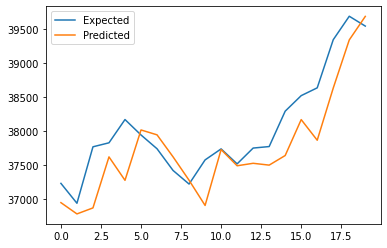

In [7]:
# plot expected vs preducted
pyplot.plot(y, label='Expected')
pyplot.plot(yhat, label='Predicted')
pyplot.legend()
pyplot.show()

In [25]:
# series = read_csv('bnf_10_year_data.csv', header=0, index_col=0)
# values = series.values
# # transform the time series data into supervised learning
# data = series_to_supervised(values, n_in=4)
# train, test = train_test_split(data, 100)

In [14]:
# len(train), len(test)

(2977, 100)

In [2]:
# import pandas as pd
# import numpy as np
# import tensorflow as tf
# from model import levenberg_marquardt as lm

In [48]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(20, activation='tanh', input_shape=(1,)),
#     tf.keras.layers.Dense(1, activation='linear')])

# model.summary()

# model.compile(
#     optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
#     loss=tf.keras.losses.MeanSquaredError())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 20)                40        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [49]:
# x_train = train[:,:4]
# y_train = train[:,4]

In [50]:
# x_train = tf.expand_dims(tf.cast(x_train, tf.float32), axis=-1)
# y_train = tf.expand_dims(tf.cast(y_train, tf.float32), axis=-1)

# train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))

In [51]:
# model.fit(train_dataset, epochs=5)

Epoch 1/5
2974/2974 [==============================] - 9s 1ms/step - loss: 359140416.0000


Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x0000024AA5595CA0>
Traceback (most recent call last):
  File "C:\Users\sanke\AppData\Local\Programs\Python\Python39\lib\weakref.py", line 368, in remove
    self = selfref()
KeyboardInterrupt: 


Epoch 2/5
2974/2974 [==============================] - 3s 1ms/step - loss: 338359392.0000
Epoch 3/5
2974/2974 [==============================] - 3s 959us/step - loss: 319469056.0000
Epoch 4/5
2974/2974 [==============================] - 3s 925us/step - loss: 301359136.0000
Epoch 5/5
2974/2974 [==============================] - 3s 919us/step - loss: 283997376.0000
